### Import required packages

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from collections import Counter
import numpy as np
import missingno
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, shapiro

### Create how many friends does each user have feature or how many tags that each video has.

In [146]:
def redifne_friends_list_or_feat(value):
    value = value.replace('[','').replace(']','').replace(' ','')
    value = value.split(',')
    value = [int(x) for x in value]
    return value

### Check data quality for missing values.

In [147]:
def missing_info(dataset):
  # count the ratio of missing values
  total_miss = dataset.isnull().sum()
  if dataset.isna().values.any() == True:
    #this condidtion will be evaluated.
    print(f"There are {total_miss} missing values in this dataset.")
    plot_missing(dataset)
    percent_miss = (total_miss/dataset.isnull().count()*100)
    # sort attributes by missing value ratio
    missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
    missing_data.sort_values(by='Total missing',ascending=False)
    return missing_data
  else:
    return "There are no missing values in this dataset."


### Check data quality for outliers.

In [148]:
#find the outlier 
def find_outliers(column):
   sns.set_theme(style="whitegrid")
   sns.set(rc={'figure.figsize':(15,6)})
   founded_outlier = sns.boxplot(x=column)
   founded_outlier.set(title = "Founded feature with outliers")

### Plot missings graphs

In [149]:
#analyzing missing data
def plot_missing(dataset):
  #bar chart
  missingno.bar(dataset)
  #visualize missing values as a matrix
  missingno.matrix(dataset)
  #heapmap for correlation analysis
  missingno.heatmap(dataset)
  #dendrogram plot
  #missingno.dendrogram(dataset)

### Plot distribution a numerical feature.

In [150]:
def distribution_of_feature(df,dataset_name,feature_name):
    plt.figure(figsize=(20,10))
    dist = sns.displot(data = df, kde=True)
    fig_title = f"distribution of {feature_name} in {dataset_name}"
    dist.set(title = fig_title)

### Plot helper

In [151]:
def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    ncount = len(df)

    fig = plt.figure(figsize=size)
    ax1 = fig.add_axes([0.14, 0.15, 0.74, 0.75])
    sns.countplot(x=df, color="#9fc5e8", linewidth=.6, edgecolor='k', ax=ax1, order=order)


    plt.grid(axis='y', linestyle='-.')

    gca = plt.gca()
    fig_title = "Statistics of {}".format(var)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Count", fontsize=14)
    gca.set_xlabel(var, fontsize=14)
    
    if func:
        func(ax1)

    if display_ratio:
        # Make twin axis
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)


        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)  # set the alignment of the text

        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.show()

### Read the data


In [152]:
big_matrix = pd.read_csv("C:\\Users\\Zeyad Tarek\\Documents\\DA project\\data\\big_matrix.csv")
small_matrix = pd.read_csv('C:\\Users\\Zeyad Tarek\\Documents\\DA project\\data\\small_matrix.csv')
item_feat = pd.read_csv('C:\\Users\\Zeyad Tarek\\Documents\\DA project\\data\\item_feat.csv')
social_network = pd.read_csv('C:\\Users\\Zeyad Tarek\\Documents\\DA project\\data\\social_network.csv')

print(f"big_matrix dataset has {big_matrix.shape[0]} samples and {big_matrix.shape[1]} features.")
print(f"small_matrix dataset has {small_matrix.shape[0]} samples and {small_matrix.shape[1]} features.")
print(f"social_network dataset has {social_network.shape[0]} samples and {social_network.shape[1]} features.")
print(f"item_feat dataset has {item_feat.shape[0]} samples and {item_feat.shape[1]} features.")

big_matrix dataset has 12530806 samples and 8 features.
small_matrix dataset has 4676570 samples and 8 features.
social_network dataset has 472 samples and 2 features.
item_feat dataset has 10729 samples and 2 features.


### Datasets info.

In [153]:
print(big_matrix.info())
big_matrix.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12530806 entries, 0 to 12530805
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   video_id        int64  
 2   play_duration   int64  
 3   video_duration  int64  
 4   time            object 
 5   date            int64  
 6   timestamp       float64
 7   watch_ratio     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 764.8+ MB
None


,user_id,video_id,play_duration,video_duration,date,timestamp,watch_ratio
count,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07
mean,3.574377e+03,5.058597e+03,9.027027e+03,1.462157e+04,2.020080e+07,1.596799e+09,9.445059e-01
std,2.067008e+03,3.090082e+03,1.547343e+04,1.983474e+04,5.080192e+01,1.514698e+06,1.674601e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+02,2.020070e+07,1.592872e+09,0.000000e+00
25%,1.788000e+03,2.388000e+03,4.218000e+03,7.434000e+03,2.020080e+07,1.596339e+09,3.148246e-01
50%,3.578000e+03,4.823000e+03,7.277000e+03,9.636000e+03,2.020081e+07,1.596669e+09,7.234710e-01
75%,5.343750e+03,7.601000e+03,1.035000e+04,1.217900e+04,2.020083e+07,1.598502e+09,1.177644e+00
max,7.175000e+03,1.072800e+04,9.996390e+05,3.150720e+05,2.020090e+07,1.599694e+09,5.734571e+02


In [154]:
print(small_matrix.info())
small_matrix.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676570 entries, 0 to 4676569
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   video_id        int64  
 2   play_duration   int64  
 3   video_duration  int64  
 4   time            object 
 5   date            float64
 6   timestamp       float64
 7   watch_ratio     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 285.4+ MB
None


,user_id,video_id,play_duration,video_duration,date,timestamp,watch_ratio
count,4.676570e+06,4.676570e+06,4.676570e+06,4.676570e+06,4.494578e+06,4.494578e+06,4.676570e+06
mean,3.631649e+03,4.975787e+03,8.612637e+03,1.448645e+04,2.020077e+07,1.596241e+09,9.070695e-01
std,2.043873e+03,3.064837e+03,1.223661e+04,2.046711e+04,4.895180e+01,1.254444e+06,1.362324e+00
min,1.400000e+01,1.030000e+02,0.000000e+00,3.067000e+03,2.020070e+07,1.593801e+09,0.000000e+00
25%,1.834000e+03,2.370000e+03,5.811000e+03,7.523000e+03,2.020072e+07,1.595210e+09,4.675769e-01
50%,3.687000e+03,4.693000e+03,7.549000e+03,9.600000e+03,2.020080e+07,1.596224e+09,7.691666e-01
75%,5.421000e+03,7.475000e+03,9.880000e+03,1.193400e+04,2.020081e+07,1.597121e+09,1.120590e+00
max,7.162000e+03,1.059600e+04,7.988155e+06,3.150720e+05,2.020090e+07,1.599321e+09,5.715214e+02


In [155]:
print(social_network.info())
social_network.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      472 non-null    int64 
 1   friend_list  472 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.5+ KB
None


,user_id
count,472.000000
mean,3403.218220
std,2079.018308
min,18.000000
25%,1648.000000
50%,3268.000000
75%,5233.500000
max,7174.000000


In [156]:
print(item_feat.info())
item_feat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10729 entries, 0 to 10728
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  10729 non-null  int64 
 1   feat      10729 non-null  object
dtypes: int64(1), object(1)
memory usage: 167.8+ KB
None


,video_id
count,10729.000000
mean,5364.000000
std,3097.339853
min,0.000000
25%,2682.000000
50%,5364.000000
75%,8046.000000
max,10728.000000


### Get some samples from the data.

In [157]:
big_matrix.sample(15)

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
4650513,2680,7144,12459,10767,2020-08-05 05:25:22.797,20200805,1.596576e+09,1.157147
11919652,6820,4286,5577,10496,2020-08-02 11:28:15.391,20200802,1.596339e+09,0.531345
6648096,3787,607,11663,7686,2020-08-03 22:37:41.043,20200803,1.596465e+09,1.517434
7452862,4234,570,0,25310,2020-08-09 19:08:13.215,20200809,1.596971e+09,0.000000
9126251,5189,5602,2440,15467,2020-08-10 11:36:01.354,20200810,1.597031e+09,0.157755
3579102,2049,4001,11169,10914,2020-08-02 21:29:30.288,20200802,1.596375e+09,1.023364
11826507,6770,2316,7948,10821,2020-08-06 16:09:15.581,20200806,1.596701e+09,0.734498
1181159,656,4418,631,7267,2020-08-05 12:07:06.138,20200805,1.596600e+09,0.086831
692412,381,8680,8996,14760,2020-08-07 22:10:18.881,20200807,1.596809e+09,0.609485
2641173,1505,617,864,9700,2020-08-07 09:39:13.662,20200807,1.596764e+09,0.089072


In [158]:
small_matrix.sample(15)

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
3950967,6018,463,6556,10900,2020-07-13 05:10:26.532,20200713.0,1.594588e+09,0.601468
3345545,5181,2552,7209,20440,2020-07-29 17:02:23.837,20200729.0,1.596013e+09,0.352691
1377016,2146,5563,9014,9317,2020-07-31 13:23:32.229,20200731.0,1.596173e+09,0.967479
2413556,3825,3968,10000,6100,2020-07-17 14:09:40.84,20200717.0,1.594966e+09,1.639344
4112252,6252,1330,0,30134,2020-08-14 19:31:13.121,20200814.0,1.597405e+09,0.000000
2353664,3706,5258,20359,13100,2020-07-16 06:37:45.083,20200716.0,1.594853e+09,1.554122
4510320,6888,1376,4792,11267,2020-08-21 03:48:02.275,20200821.0,1.597953e+09,0.425313
61678,129,7230,13463,16100,2020-08-07 07:31:10.905,20200807.0,1.596757e+09,0.836211
2199327,3471,875,7477,12434,2020-08-04 01:10:18.163,20200804.0,1.596475e+09,0.601335
4455431,6802,3815,8121,16951,2020-07-23 03:45:05.967,20200723.0,1.595447e+09,0.479087


In [159]:
social_network.sample(15)

,user_id,friend_list
374,3336,[793]
344,4657,[962]
77,4808,[334]
163,426,[1223]
454,362,[1718]
387,809,[4383]
18,6214,[6013]
312,765,[2870]
335,1751,[3252]
264,6260,"[1848, 578]"


In [160]:
item_feat.sample(15)

,video_id,feat
90,90,[9]
7472,7472,[16]
5447,5447,[8]
5942,5942,[3]
9425,9425,[11]
5060,5060,[28]
666,666,[6]
9859,9859,[14]
1584,1584,"[28, 9]"
1654,1654,[16]


### Check for missings in each dataset.

In [161]:
big_matrix_missing = missing_info(big_matrix)
big_matrix_missing

'There are no missing values in this dataset.'

There are user_id                0
video_id               0
play_duration          0
video_duration         0
time              181992
date              181992
timestamp         181992
watch_ratio            0
dtype: int64 missing values in this dataset.


,Total missing,% missing
user_id,0,0.00000
video_id,0,0.00000
play_duration,0,0.00000
video_duration,0,0.00000
time,181992,3.89157
date,181992,3.89157
timestamp,181992,3.89157
watch_ratio,0,0.00000


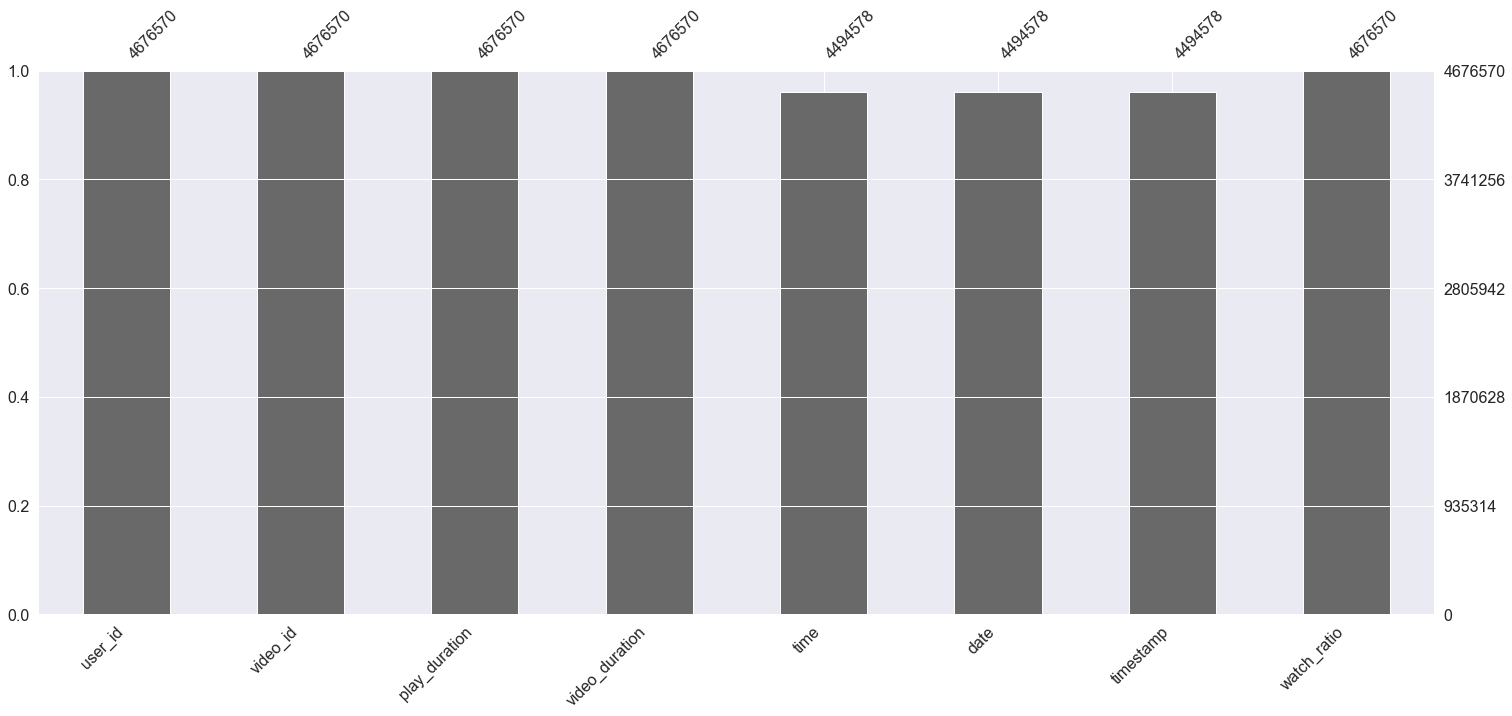

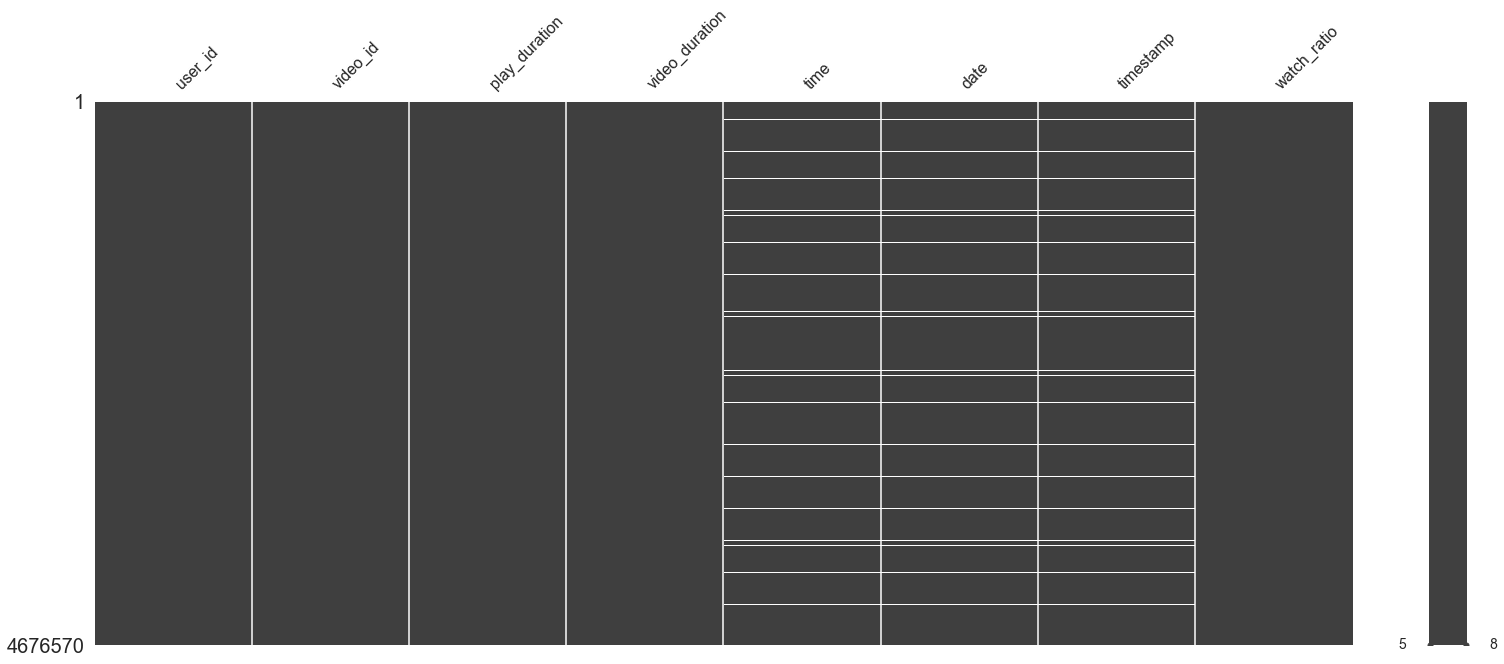

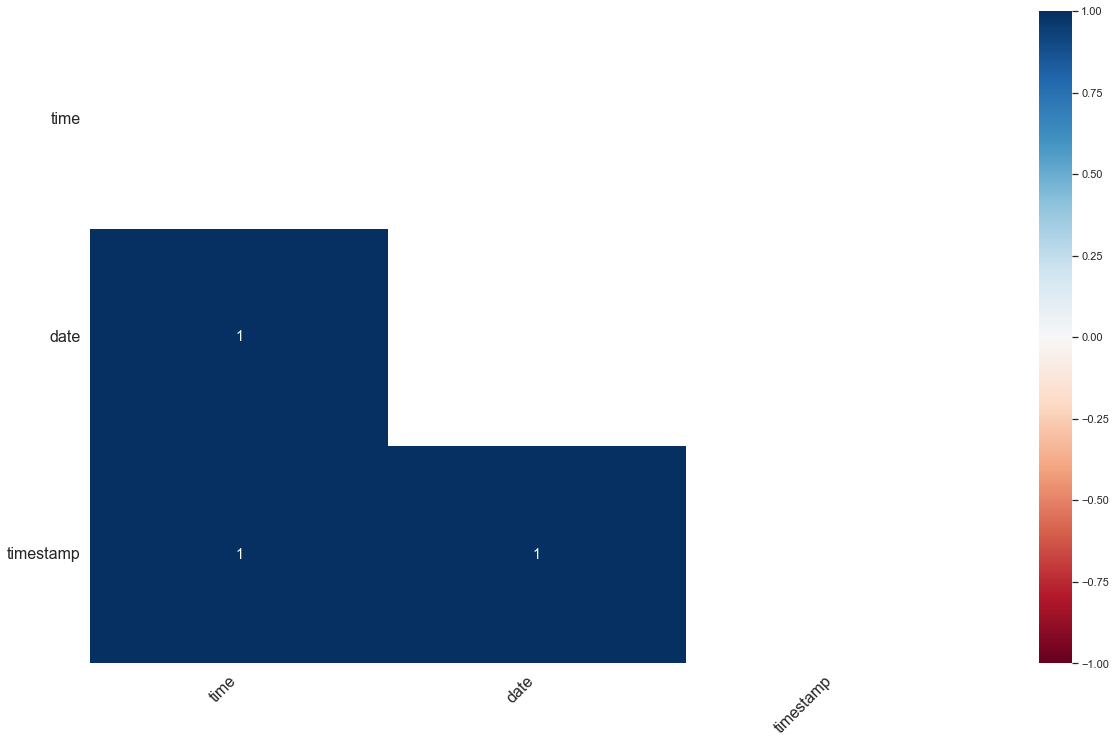

In [162]:
small_matrix_missing = missing_info(small_matrix)
small_matrix_missing

In [163]:
social_network_missing = missing_info(social_network)
social_network_missing

'There are no missing values in this dataset.'

In [164]:
item_feat_missing = missing_info(item_feat)
item_feat_missing

'There are no missing values in this dataset.'

### Check for duplicates in each dataset.

In [165]:
if big_matrix.duplicated().any()== True:
    print(f"There are {big_matrix.duplicated(keep='first').sum()} consistant duplicated values in big_matrix.csv")
    big_matrix.drop_duplicates(inplace = True)
    big_matrix.reset_index(drop=True, inplace=True)
    
else:
    print(f"There aren't any consistant duplicated values in big_matrix.csv")

There are 965819 consistant duplicated values in big_matrix.csv


In [166]:
if small_matrix.duplicated().any()== True:
    print(f"There are {small_matrix.duplicated(keep='first').sum()} consistant duplicated values in small_matrix.csv")
    small_matrix.drop_duplicates(inplace = True)
    small_matrix.reset_index(drop=True, inplace=True)

else:
    print(f"There aren't any consistant duplicated values in small_matrix.csv")

There aren't any consistant duplicated values in small_matrix.csv


In [167]:
if social_network.duplicated().any()== True:
    print(f"There are {social_network.duplicated(keep='first').sum()} consistant duplicated values in social_network.csv")
    social_network.drop_duplicates(inplace = True)
    social_network.reset_index(drop=True, inplace=True)
else:
    print(f"There aren't any consistant duplicated values in social_network.csv")

There aren't any consistant duplicated values in social_network.csv


In [168]:
if item_feat.duplicated().any()== True:
    print(f"There are {item_feat.duplicated(keep='first').sum()} consistant duplicated values in item_feat.csv")
    item_feat.drop_duplicates(inplace = True)
    item_feat.reset_index(drop=True, inplace=True)
else:
    print(f"There aren't any consistant duplicated values in item_feat.csv")

There aren't any consistant duplicated values in item_feat.csv


### Drop unwanted features.

In [169]:
big_matrix = big_matrix.drop(['time','date','timestamp'],axis = 1)
small_matrix = small_matrix.drop(['time','date','timestamp'],axis = 1)

### Check for outliers in each dataset.

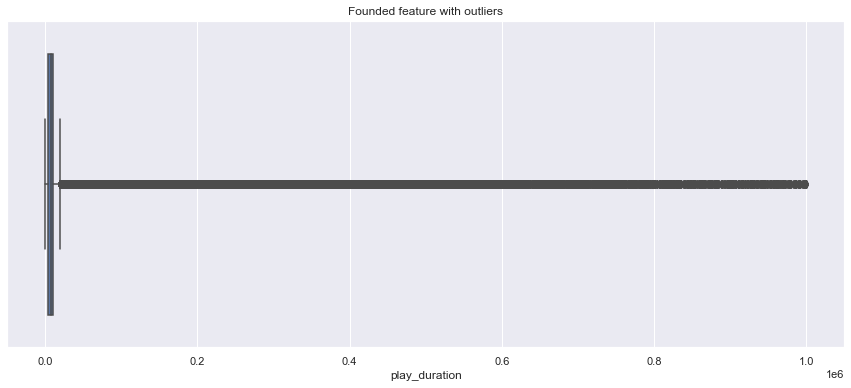

In [170]:
find_outliers(big_matrix['play_duration'])

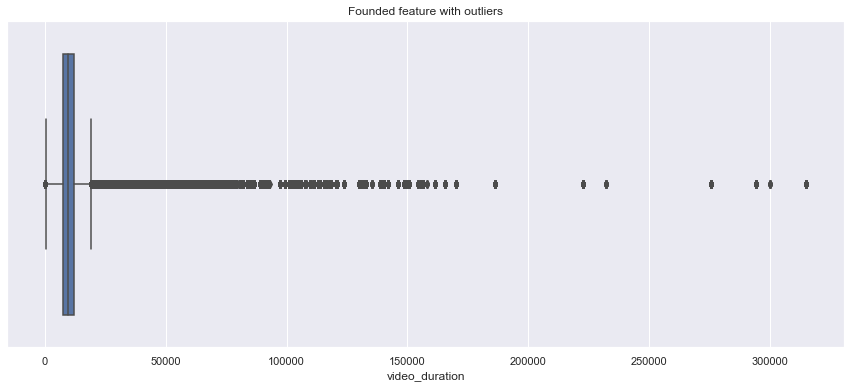

In [171]:
find_outliers(big_matrix['video_duration'])

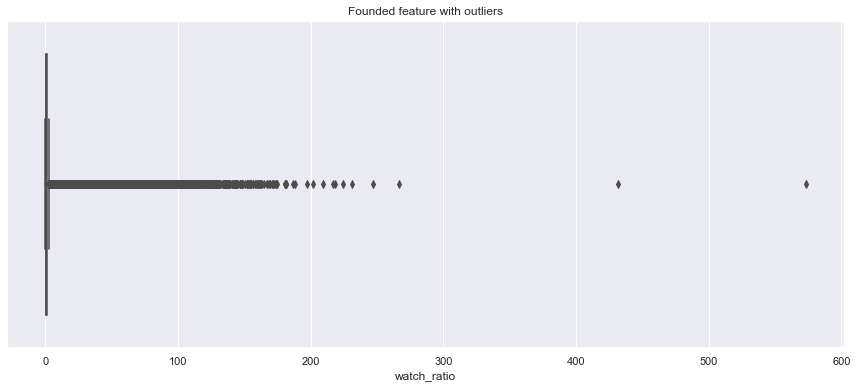

In [172]:
find_outliers(big_matrix['watch_ratio'])

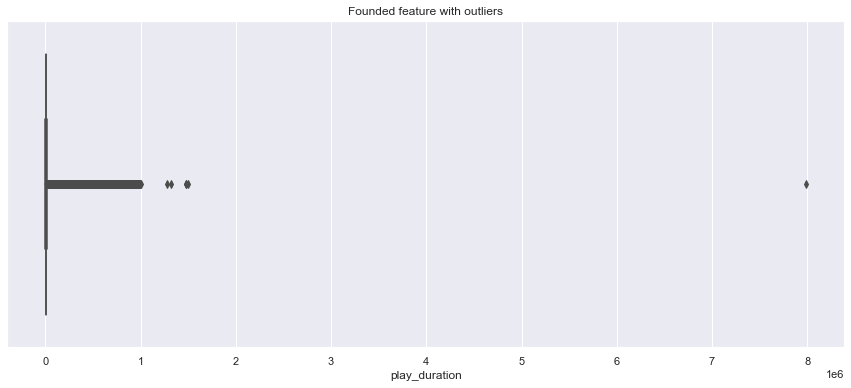

In [173]:
find_outliers(small_matrix['play_duration'])

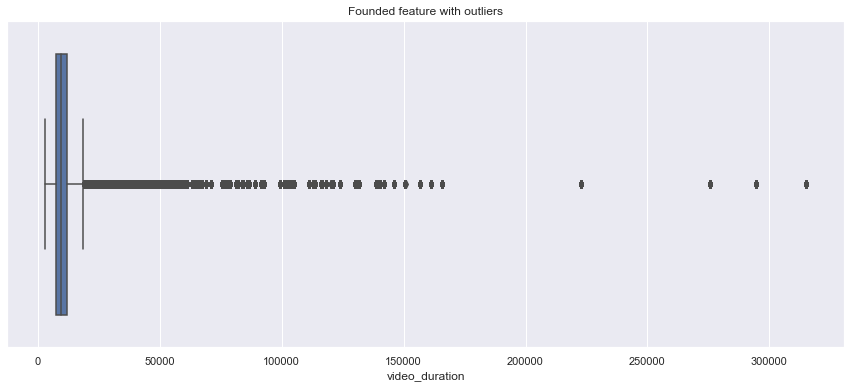

In [174]:
find_outliers(small_matrix['video_duration'])

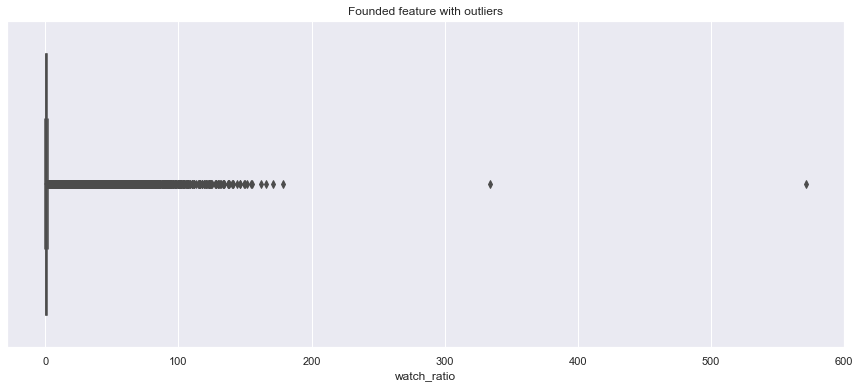

In [175]:
find_outliers(small_matrix['watch_ratio'])

### Plot the distribution for each numerical feature in big_matrix.csv and small_matrix.csv exept for user_id and video_id

<Figure size 1440x720 with 0 Axes>

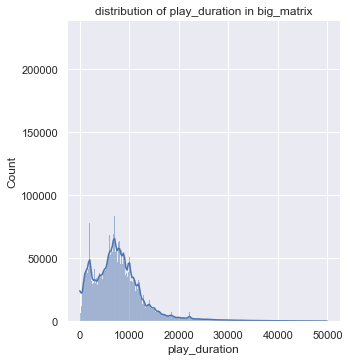

In [176]:
distribution_of_feature(big_matrix['play_duration'][big_matrix['play_duration'] <= 50000],'big_matrix','play_duration')

<Figure size 1440x720 with 0 Axes>

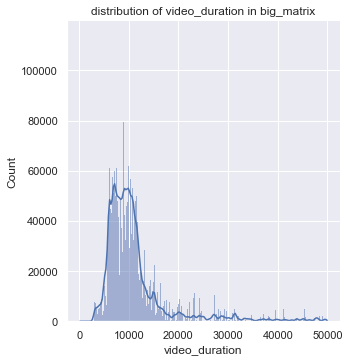

In [177]:
distribution_of_feature(big_matrix['video_duration'][big_matrix['video_duration'] <= 50000],'big_matrix','video_duration')

<Figure size 1440x720 with 0 Axes>

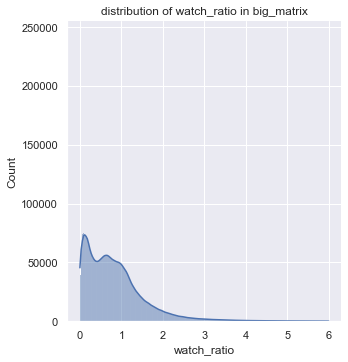

In [178]:
distribution_of_feature(big_matrix['watch_ratio'][big_matrix['watch_ratio'] <= 6],'big_matrix','watch_ratio')

<Figure size 1440x720 with 0 Axes>

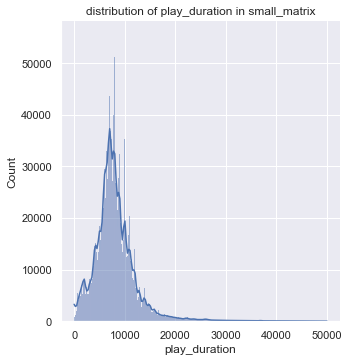

In [179]:
distribution_of_feature(small_matrix['play_duration'][small_matrix['play_duration'] <= 50000],'small_matrix','play_duration')

<Figure size 1440x720 with 0 Axes>

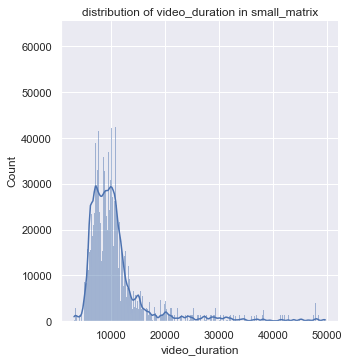

In [180]:
distribution_of_feature(small_matrix['video_duration'][small_matrix['video_duration'] <= 50000],'small_matrix','video_duration')

<Figure size 1440x720 with 0 Axes>

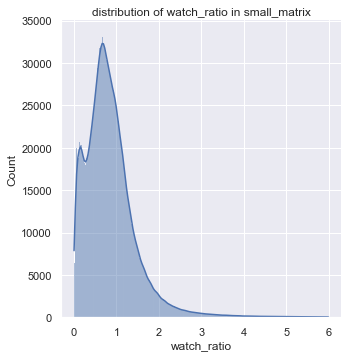

In [181]:
distribution_of_feature(small_matrix['watch_ratio'][small_matrix['watch_ratio'] <= 6],'small_matrix','watch_ratio')

### Normalize each numerical feature in big_matrix.csv and small_matrix.csv exept for user_id and video_id

In [182]:
min_max_scaler = MinMaxScaler()
big_matrix[['video_duration','play_duration']] = min_max_scaler.fit_transform(big_matrix[['video_duration','play_duration']])
small_matrix[['video_duration','play_duration']] = min_max_scaler.fit_transform(small_matrix[['video_duration','play_duration']])

### Feature engineering for social_network.csv and item_feat.csv

In [183]:
social_network.friend_list = social_network.friend_list.apply(redifne_friends_list_or_feat)

In [184]:
social_network.sample(10)

,user_id,friend_list
395,213,[4358]
294,599,[5412]
467,2331,[4345]
257,2658,[1234]
443,1589,[3756]
215,5333,[3672]
354,1770,"[1386, 2461]"
200,2924,[2465]
6,676,[5626]
456,4450,"[2390, 1924]"


In [185]:
item_feat.feat = item_feat.feat.apply(redifne_friends_list_or_feat)

In [186]:
item_feat.sample(10)

,video_id,feat
4534,4534,"[8, 11]"
8840,8840,[7]
2515,2515,"[28, 25]"
2314,2314,[18]
69,69,[28]
7208,7208,[19]
5106,5106,[11]
4698,4698,[2]
9641,9641,[5]
2602,2602,[19]


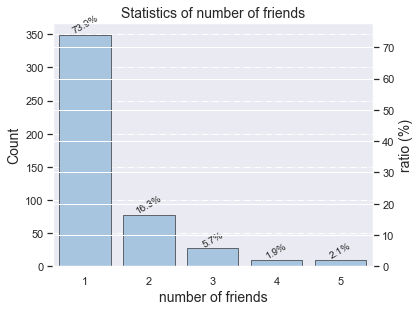

<AxesSubplot:ylabel='friend_list_len'>

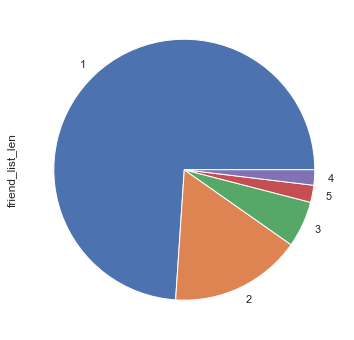

In [187]:
social_network['friend_list_len'] = social_network.friend_list.apply(lambda x: len(x))
visual_statistics_discrete(social_network['friend_list_len'], "number of friends")
social_network['friend_list_len'].value_counts().plot.pie()

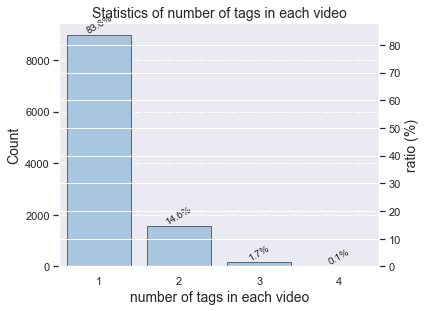

<AxesSubplot:ylabel='feat_len'>

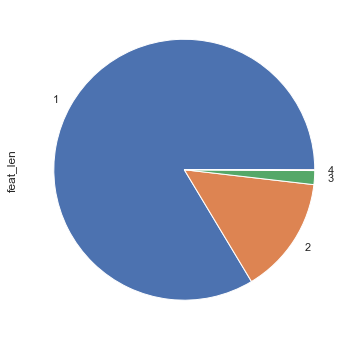

In [188]:
item_feat['feat_len'] = item_feat.feat.apply(lambda x: len(x))
visual_statistics_discrete(item_feat['feat_len'], "number of tags in each video")
item_feat['feat_len'].value_counts().plot.pie()

In [189]:
all_tags_occurance = item_feat['feat'].explode()
all_tags_occurance.value_counts()

11    2028
28    1360
8     1112
5      964
6      912
9      696
19     686
12     534
7      503
26     490
25     468
1      463
15     374
17     350
20     265
13     245
2      216
16     214
10     170
4      164
18     131
3      104
14      63
23      39
27      31
21      29
0       24
30      22
22      20
24      12
29       5
Name: feat, dtype: int64

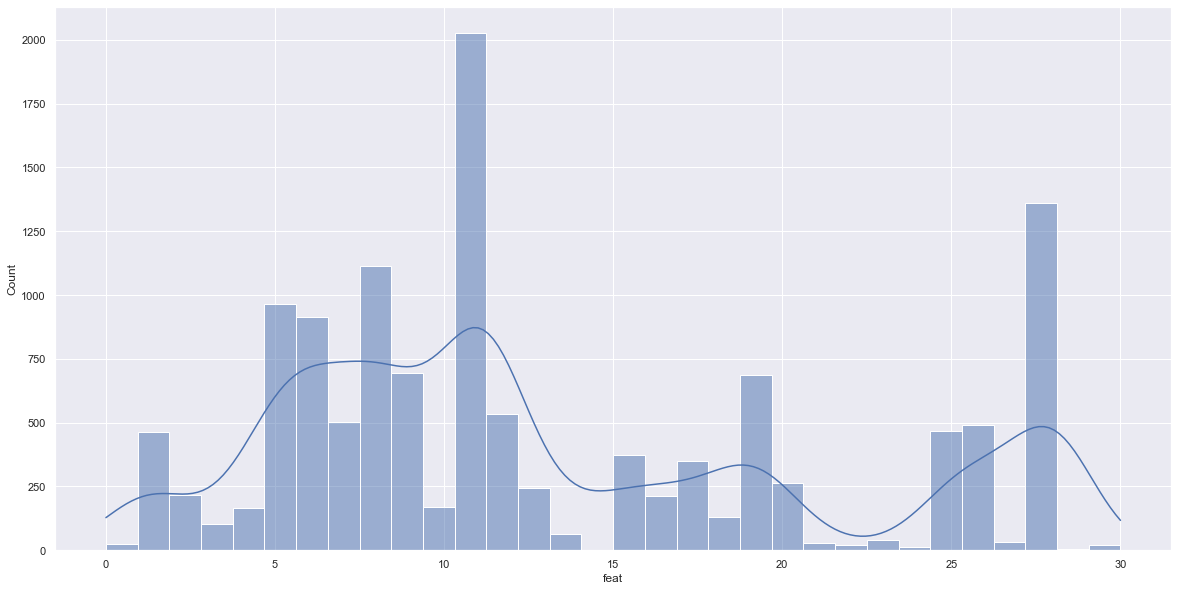

In [190]:
plt.figure(figsize=(20,10))
ax = sns.histplot(all_tags_occurance,kde=True,bins=32)

### Hypothese test

H0: The shorter videos {less than 1 minutes} are more favorite than (more than) longer
videos for the users.<br>
H1: Both type of these videos have the same degree of preferences?

In [191]:
new_1 = big_matrix.loc[(big_matrix['video_duration']>=10000)]['watch_ratio']
new_2 = big_matrix.loc[(big_matrix['video_duration']<10000)]['watch_ratio']

print(len(new_1))
print(len(new_2))


print(new_1.mean())
print(new_2.mean())

ttest,significance_level = ttest_ind(new_1,new_2,equal_var=False) #Assume samples have equal variance
print("p-value: ",significance_level)
print(f"t-test value: {ttest}")

if significance_level > 0.05:
  print("we accept null hypothesis")
else:
  print("we reject null hypothesis")

0
11564987
nan
0.9465882226377007
p-value:  nan
t-test value: nan
we reject null hypothesis


In [192]:
new_1 = small_matrix.loc[(small_matrix['video_duration']>=10000)]['watch_ratio']
new_2 = small_matrix.loc[(small_matrix['video_duration']<10000)]['watch_ratio']

print(len(new_1))
print(len(new_2))


print(new_1.mean())
print(new_2.mean())

ttest,significance_level = ttest_ind(new_1,new_2,equal_var=False) #Assume samples have equal variance
print("p-value: ",significance_level)
print(f"t-test value: {ttest}")

if significance_level > 0.05:
  print("we accept null hypothesis")
else:
  print("we reject null hypothesis")

0
4676570
nan
0.9070694783381421
p-value:  nan
t-test value: nan
we reject null hypothesis


### Join small_matrix.csv with social_network.csv on user_id column.

In [193]:
small_matrix  = pd.merge(small_matrix, social_network, on='user_id', how='outer')

### Join small_matrix.csv with social_network.csv on video_id column.

In [194]:
small_matrix  = pd.merge(small_matrix, item_feat, on='video_id', how='outer')

In [195]:
small_matrix = small_matrix.fillna(0)

In [196]:
small_matrix.head()

,user_id,video_id,play_duration,video_duration,watch_ratio,friend_list,friend_list_len,feat,feat_len
0,14.0,148.0,0.000548,0.009615,0.722103,0,0.0,"[11, 28, 19]",3.0
1,19.0,148.0,0.001022,0.009615,1.346135,0,0.0,"[11, 28, 19]",3.0
2,21.0,148.0,0.001103,0.009615,1.452283,0,0.0,"[11, 28, 19]",3.0
3,23.0,148.0,0.001444,0.009615,1.901764,0,0.0,"[11, 28, 19]",3.0
4,24.0,148.0,0.001609,0.009615,2.119004,[2665],1.0,"[11, 28, 19]",3.0


### Divid big_matrix.csv into 50 chunks to make feature engineering process an easy process and to prevent memory crashing.

In [197]:
divided_big_matrix = np.array_split(big_matrix, 50)

In [198]:
divided_big_matrix[49]

,user_id,video_id,play_duration,video_duration,watch_ratio
11333688,7019,1457,0.005177,0.026403,0.612064
11333689,7019,7956,0.001142,0.014521,0.242309
11333690,7019,6310,0.004953,0.018820,0.816054
11333691,7019,9200,0.013537,0.028276,1.496075
11333692,7019,9014,0.004262,0.042974,0.311540
...,...,...,...,...,...
11564982,7175,1282,0.034631,0.444150,0.247241
11564983,7175,3408,0.012624,0.069056,0.576526
11564984,7175,10361,0.002408,0.021995,0.340597
11564985,7175,10361,0.006457,0.021995,0.913400


In [199]:
for i in range(len(divided_big_matrix)):
    divided_big_matrix[i] = divided_big_matrix[i].reset_index(drop=True)

### create liked feature in big_matrix.csv

In [200]:
import time
start_time = time.time()
all_big_matries = []
for i in range(len(divided_big_matrix)):
    print(f"Start with dataset {i+1}.")
    for j in range(len(divided_big_matrix[i])):
        divided_big_matrix[i].loc[j,'liked'] = 1 if divided_big_matrix[i].loc[j,'watch_ratio'] > 0.9 else 0
    all_big_matries.append(divided_big_matrix[i])
big_matrix = pd.concat(all_big_matries, ignore_index=True)
final_time = time.time() - start_time
print(f"--- {final_time // 60} minutes ---")

Start with dataset 1.
Start with dataset 2.
Start with dataset 3.
Start with dataset 4.
Start with dataset 5.
Start with dataset 6.
Start with dataset 7.
Start with dataset 8.
Start with dataset 9.
Start with dataset 10.
Start with dataset 11.
Start with dataset 12.
Start with dataset 13.
Start with dataset 14.
Start with dataset 15.
Start with dataset 16.
Start with dataset 17.
Start with dataset 18.
Start with dataset 19.
Start with dataset 20.
Start with dataset 21.
Start with dataset 22.
Start with dataset 23.
Start with dataset 24.
Start with dataset 25.
Start with dataset 26.
Start with dataset 27.
Start with dataset 28.
Start with dataset 29.
Start with dataset 30.
Start with dataset 31.
Start with dataset 32.
Start with dataset 33.
Start with dataset 34.
Start with dataset 35.
Start with dataset 36.
Start with dataset 37.
Start with dataset 38.
Start with dataset 39.
Start with dataset 40.
Start with dataset 41.
Start with dataset 42.
Start with dataset 43.
Start with dataset 4

In [201]:
big_matrix.to_csv('C:\\Users\\Zeyad Tarek\\Documents\\DA project\\big_matrix.csv')

In [202]:
divided_big_matrix[0]

,user_id,video_id,play_duration,video_duration,watch_ratio,liked
0,0,3650,0.013843,0.034061,1.273397,1.0
1,0,9599,0.013670,0.034433,1.244082,1.0
2,0,5263,0.000851,0.024666,0.107613,0.0
3,0,1964,0.000862,0.030006,0.089885,0.0
4,0,8235,0.000858,0.034484,0.078000,0.0
...,...,...,...,...,...,...
231295,132,7697,0.005075,0.027952,0.567259,0.0
231296,132,1261,0.006479,0.032156,0.630856,0.0
231297,132,6304,0.005999,0.017880,1.039161,1.0
231298,132,5908,0.008541,0.019064,1.389648,1.0


In [203]:
big_matrix.sample(100)

,user_id,video_id,play_duration,video_duration,watch_ratio,liked
6480900,4007,2715,0.011069,0.023688,1.455921,1.0
4099808,2553,1212,0.002176,0.142869,0.048190,0.0
29098,16,5539,0.004815,0.021748,0.688654,0.0
7040021,4333,9886,0.008916,0.044692,0.627014,0.0
9301639,5744,3161,0.007220,0.023754,0.946989,1.0
...,...,...,...,...,...,...
2274330,1398,6052,0.010075,0.047629,0.665192,0.0
10243917,6341,9178,0.010942,0.117692,0.293993,0.0
3267014,2022,1910,0.015719,0.045280,1.091181,1.0
4022211,2504,7528,0.007310,0.020535,1.105948,1.0


### Divid small_matrix.csv into 50 chunks to make feature engineering process an easy process and to prevent memory crashing.

In [204]:
divided_small_matrix = np.array_split(small_matrix, 50)

In [205]:
for i in range(len(divided_small_matrix)):
    divided_small_matrix[i] = divided_small_matrix[i].reset_index(drop=True)

### create liked feature in small_matrix.csv

In [206]:
import time
start_time = time.time()
all_small_matries = []
for i in range(len(divided_small_matrix)):
    print(f"Start with dataset {i+1}.")
    for j in range(len(divided_small_matrix[i])):
        divided_small_matrix[i].loc[j,'liked'] = 1 if divided_small_matrix[i].loc[j,'watch_ratio'] > 0.9 else 0
    all_small_matries.append(divided_small_matrix[i])
small_matrix = pd.concat(all_small_matries, ignore_index=True )
final_time = time.time() - start_time
print(f"--- {final_time // 60} minutes ---")

Start with dataset 1.
Start with dataset 2.
Start with dataset 3.
Start with dataset 4.
Start with dataset 5.
Start with dataset 6.
Start with dataset 7.
Start with dataset 8.
Start with dataset 9.
Start with dataset 10.
Start with dataset 11.
Start with dataset 12.
Start with dataset 13.
Start with dataset 14.
Start with dataset 15.
Start with dataset 16.
Start with dataset 17.
Start with dataset 18.
Start with dataset 19.
Start with dataset 20.
Start with dataset 21.
Start with dataset 22.
Start with dataset 23.
Start with dataset 24.
Start with dataset 25.
Start with dataset 26.
Start with dataset 27.
Start with dataset 28.
Start with dataset 29.
Start with dataset 30.
Start with dataset 31.
Start with dataset 32.
Start with dataset 33.
Start with dataset 34.
Start with dataset 35.
Start with dataset 36.
Start with dataset 37.
Start with dataset 38.
Start with dataset 39.
Start with dataset 40.
Start with dataset 41.
Start with dataset 42.
Start with dataset 43.
Start with dataset 4

In [207]:
small_matrix.head()

,user_id,video_id,play_duration,video_duration,watch_ratio,friend_list,friend_list_len,feat,feat_len,liked
0,14.0,148.0,0.000548,0.009615,0.722103,0,0.0,"[11, 28, 19]",3.0,0.0
1,19.0,148.0,0.001022,0.009615,1.346135,0,0.0,"[11, 28, 19]",3.0,1.0
2,21.0,148.0,0.001103,0.009615,1.452283,0,0.0,"[11, 28, 19]",3.0,1.0
3,23.0,148.0,0.001444,0.009615,1.901764,0,0.0,"[11, 28, 19]",3.0,1.0
4,24.0,148.0,0.001609,0.009615,2.119004,[2665],1.0,"[11, 28, 19]",3.0,1.0


In [208]:
small_matrix.to_csv('C:\\Users\\Zeyad Tarek\\Documents\\DA project\\small_matrix.csv')

In [209]:
print(big_matrix.info())
big_matrix.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11564987 entries, 0 to 11564986
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   video_id        int64  
 2   play_duration   float64
 3   video_duration  float64
 4   watch_ratio     float64
 5   liked           float64
dtypes: float64(4), int64(2)
memory usage: 529.4 MB
None


,user_id,video_id,play_duration,video_duration,watch_ratio,liked
count,1.156499e+07,1.156499e+07,1.156499e+07,1.156499e+07,1.156499e+07,1.156499e+07
mean,3.573101e+03,5.051682e+03,9.023437e-03,4.577321e-02,9.465882e-01,3.963277e-01
std,2.066797e+03,3.093335e+03,1.546142e-02,6.290061e-02,1.678802e+00,4.891340e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.787000e+03,2.375000e+03,4.214521e-03,2.305260e-02,3.165311e-01,0.000000e+00
50%,3.577000e+03,4.836000e+03,7.273626e-03,3.014619e-02,7.254138e-01,0.000000e+00
75%,5.340000e+03,7.602000e+03,1.034774e-02,3.803043e-02,1.179920e+00,1.000000e+00
max,7.175000e+03,1.072800e+04,1.000000e+00,1.000000e+00,5.734571e+02,1.000000e+00


In [210]:
print(small_matrix.info())
small_matrix.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684298 entries, 0 to 4684297
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          float64
 1   video_id         float64
 2   play_duration    float64
 3   video_duration   float64
 4   watch_ratio      float64
 5   friend_list      object 
 6   friend_list_len  float64
 7   feat             object 
 8   feat_len         float64
 9   liked            float64
dtypes: float64(8), object(2)
memory usage: 357.4+ MB
None


,user_id,video_id,play_duration,video_duration,watch_ratio,friend_list_len,feat_len,liked
count,4.684298e+06,4.684298e+06,4.684298e+06,4.684298e+06,4.684298e+06,4.684298e+06,4.684298e+06,4.684298e+06
mean,3.625886e+03,4.976329e+03,1.076397e-03,3.653984e-02,9.055730e-01,1.514560e-01,1.381413e+00,3.953056e-01
std,2.047350e+03,3.065142e+03,1.531206e-03,6.556136e-02,1.361697e+00,5.304202e-01,5.758893e-01,4.889163e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.828000e+03,2.370000e+03,7.258247e-04,1.423375e-02,4.657580e-01,0.000000e+00,1.000000e+00,0.000000e+00
50%,3.678000e+03,4.699000e+03,9.440227e-04,2.090672e-02,7.681690e-01,0.000000e+00,1.000000e+00,0.000000e+00
75%,5.417000e+03,7.482000e+03,1.236205e-03,2.841942e-02,1.119859e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,7.174000e+03,1.072800e+04,1.000000e+00,1.000000e+00,5.715214e+02,5.000000e+00,4.000000e+00,1.000000e+00


### Start creating and evaluting models.

#### neural network model to predict watch_ratio values.

In [211]:
callback = EarlyStopping(monitor='loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_mean_squared_error', 
                                patience=2, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

model = tf.keras.Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add (Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(loss = tf.keras.losses.mse, #mse stands for mean sequared error
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), #Adam optimizer
              metrics =[
        metrics.MeanSquaredError(),
        metrics.MeanAbsoluteError(),
    ])
history = model.fit(big_matrix[['play_duration','video_duration']], big_matrix['watch_ratio'], validation_split=0.2 , shuffle= True , epochs = 10, batch_size= 128, callbacks=[reduce_lr,callback])

Epoch 1/10
72282/72282 [==============================] - 134s 2ms/step - loss: 0.4364 - mean_squared_error: 0.4364 - mean_absolute_error: 0.2088 - val_loss: 10.1927 - val_mean_squared_error: 10.1927 - val_mean_absolute_error: 3.0738 - lr: 0.0100
Epoch 2/10
72282/72282 [==============================] - 129s 2ms/step - loss: 0.2989 - mean_squared_error: 0.2989 - mean_absolute_error: 0.1797 - val_loss: 11.8683 - val_mean_squared_error: 11.8683 - val_mean_absolute_error: 3.3091 - lr: 0.0100
Epoch 3/10
72255/72282 [============================>.] - ETA: 0s - loss: 0.2802 - mean_squared_error: 0.2802 - mean_absolute_error: 0.1769
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
72282/72282 [==============================] - 128s 2ms/step - loss: 0.2802 - mean_squared_error: 0.2802 - mean_absolute_error: 0.1769 - val_loss: 13.0377 - val_mean_squared_error: 13.0377 - val_mean_absolute_error: 3.4539 - lr: 0.0100
Epoch 4/10
72282/72282 [==============================

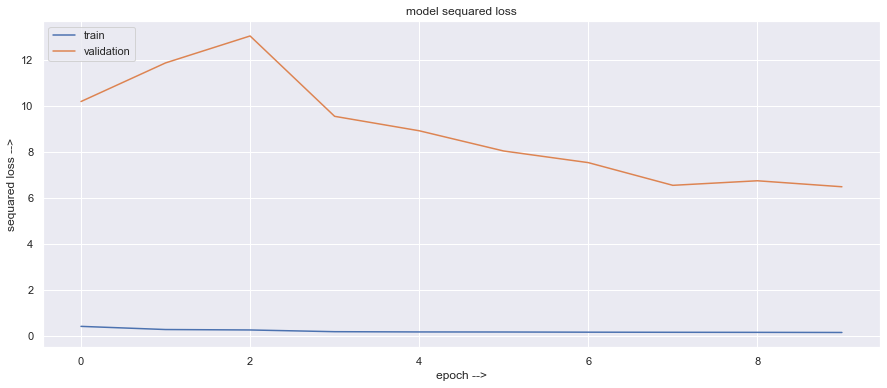

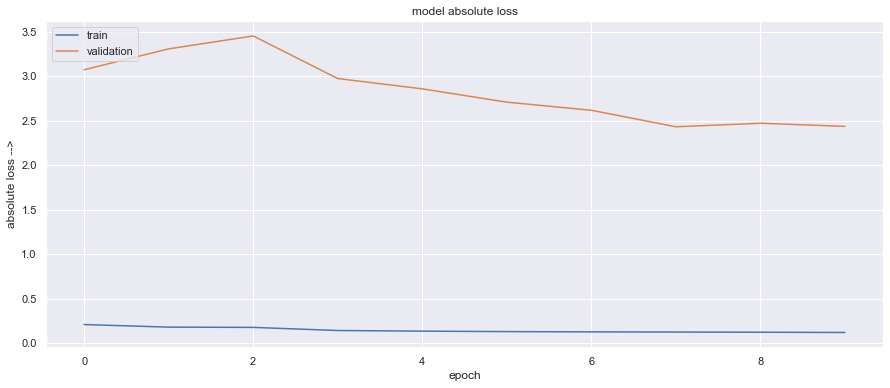

In [212]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model sequared loss')
plt.ylabel('sequared loss -->')
plt.xlabel('epoch -->')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model absolute loss')
plt.ylabel('absolute loss -->')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [213]:
print("Evaluate on test data")
results = model.evaluate(small_matrix[['play_duration','video_duration']], small_matrix['watch_ratio'], batch_size=128)
print(f"squared loss: {results[1]}, absolute loss: {results[2]}", )

Evaluate on test data
36597/36597 [==============================] - 33s 907us/step - loss: 5.7970 - mean_squared_error: 5.7970 - mean_absolute_error: 2.1218
squared loss: 5.797011375427246, absolute loss: 2.121798515319824


#### neural network model to predict liked labels.

In [214]:
callback = EarlyStopping(monitor='val_accuracy', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=2, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

model = tf.keras.Sequential()
model.add(Dense(512,input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add (Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', #mse stands for mean sequared error
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), #Adam optimizer
              metrics =[
        metrics.Accuracy(),
        metrics.Recall(),
        metrics.Precision()
    ])
history = model.fit(big_matrix[['play_duration','video_duration']], big_matrix['liked'], validation_split=0.2 , shuffle= True , epochs = 10, batch_size= 128, callbacks=[reduce_lr,callback])

Epoch 1/10
72282/72282 [==============================] - 302s 4ms/step - loss: 0.0471 - accuracy: 0.5081 - recall_25: 0.9751 - precision_25: 0.9741 - val_loss: 0.0295 - val_accuracy: 0.8042 - val_recall_25: 0.9531 - val_precision_25: 1.0000 - lr: 0.0100
Epoch 2/10
72282/72282 [==============================] - 312s 4ms/step - loss: 0.0312 - accuracy: 0.7191 - recall_25: 0.9864 - precision_25: 0.9825 - val_loss: 0.0193 - val_accuracy: 0.7629 - val_recall_25: 0.9732 - val_precision_25: 1.0000 - lr: 0.0100
Epoch 3/10
72272/72282 [============================>.] - ETA: 0s - loss: 0.0274 - accuracy: 0.6770 - recall_25: 0.9897 - precision_25: 0.9850
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
72282/72282 [==============================] - 347s 5ms/step - loss: 0.0274 - accuracy: 0.6770 - recall_25: 0.9897 - precision_25: 0.9850 - val_loss: 0.0155 - val_accuracy: 0.6461 - val_recall_25: 1.0000 - val_precision_25: 0.9797 - lr: 0.0100
Epoch 4/10
72282/72282 [===

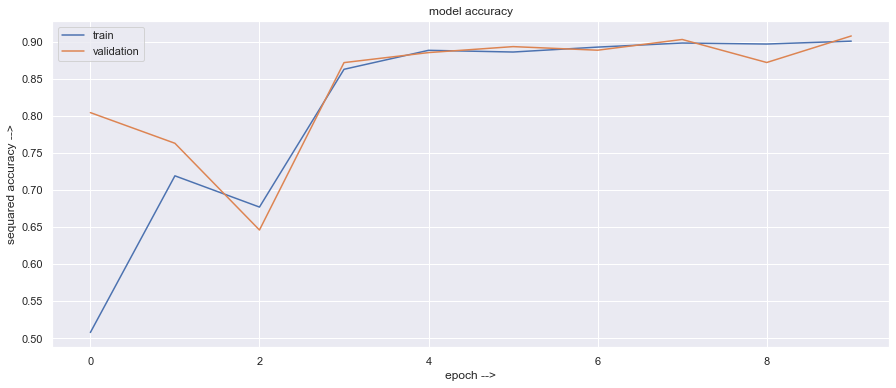

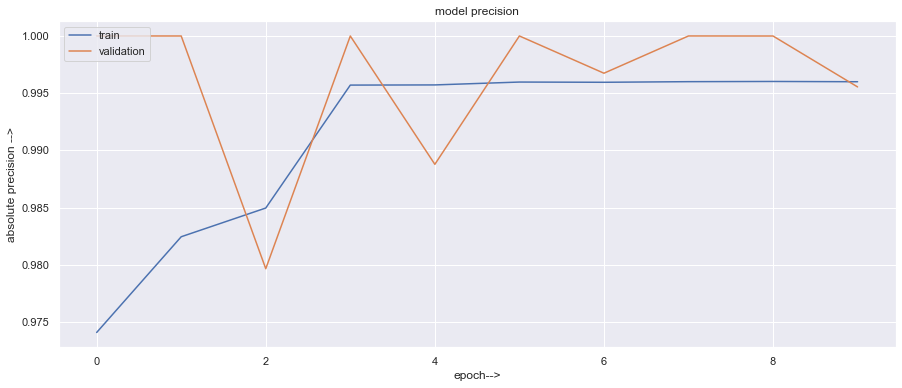

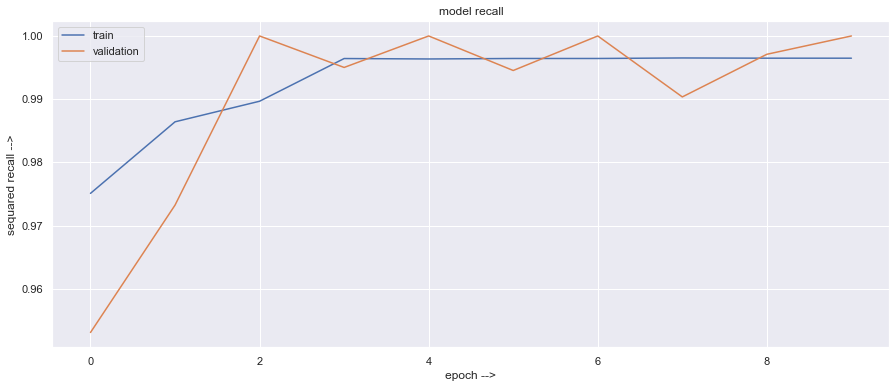

In [216]:
# summarize history for accracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('sequared accuracy -->')
plt.xlabel('epoch -->')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for precision
plt.plot(history.history['precision_25'])
plt.plot(history.history['val_precision_25'])
plt.title('model precision')
plt.ylabel('absolute precision -->')
plt.xlabel('epoch-->')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for recall

plt.plot(history.history['recall_25'])
plt.plot(history.history['val_recall_25'])
plt.title('model recall')
plt.ylabel('sequared recall -->')
plt.xlabel('epoch -->')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [217]:
print("Evaluate on test data")
results = model.evaluate(small_matrix[['play_duration','video_duration']], small_matrix['liked'], batch_size=128)
print(f"Accuracy: {results[1]},recall: {results[2]}, precision: {results[3]}", )

Evaluate on test data
36597/36597 [==============================] - 59s 2ms/step - loss: 340.4318 - accuracy: 0.6106 - recall_25: 0.0306 - precision_25: 0.9920
Accuracy: 0.6105663776397705,recall: 0.030649732798337936, precision: 0.9920468330383301
